<a href="https://colab.research.google.com/github/fatdumplingg/CountryUrgencyLevel-KMeansClustering/blob/main/CountryUrgencyLevelGrouping_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COUNTRY URGENCY LEVEL CLUSTERING**

> Goal : to group all world countries into a categories based on the level of assistance they may (or may not) require from other countries.

> Dataset credit : https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

> Clustering will use evaluations of each country's measured values in 9 fields : child mortality, exports, health, imports, income, inflation, life-expentancy, total-fertility, and gdp-per-capita.




###PART 1 : DATA ACQUISITION

###Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#importing libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

###Loading Dataset



> Seen below is the original unaltered dataset from the source.

> There are names of all countries with the 9 measured fields for each country.



In [ ]:
data = pd.read_csv("Country-data.csv")
df = data.copy()
original = df.copy()
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [ ]:
original

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


> Let's check if there are any null values in the dataset. If none, continue to proceed to the next step.

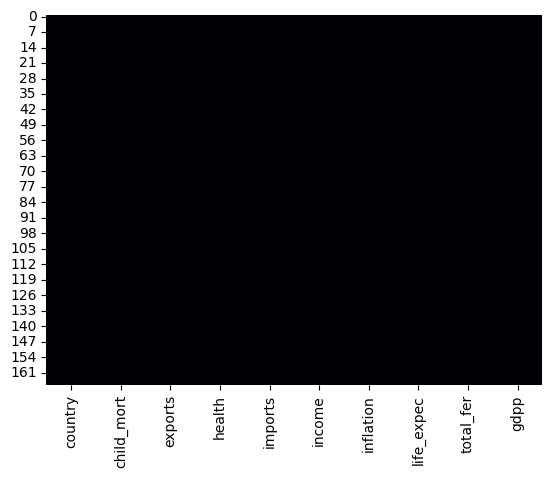

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);
#reuslt : no null values in data

> For reference, below are the statistics of the dataset, such as the mean, standard deviation, min, max, etc of each field/feature in the dataset.

In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [ ]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


###PART 2 : EXPLORATORY DATA ANALYSIS

####A : REFERENCE

> The distribution of each feature in the dataset.

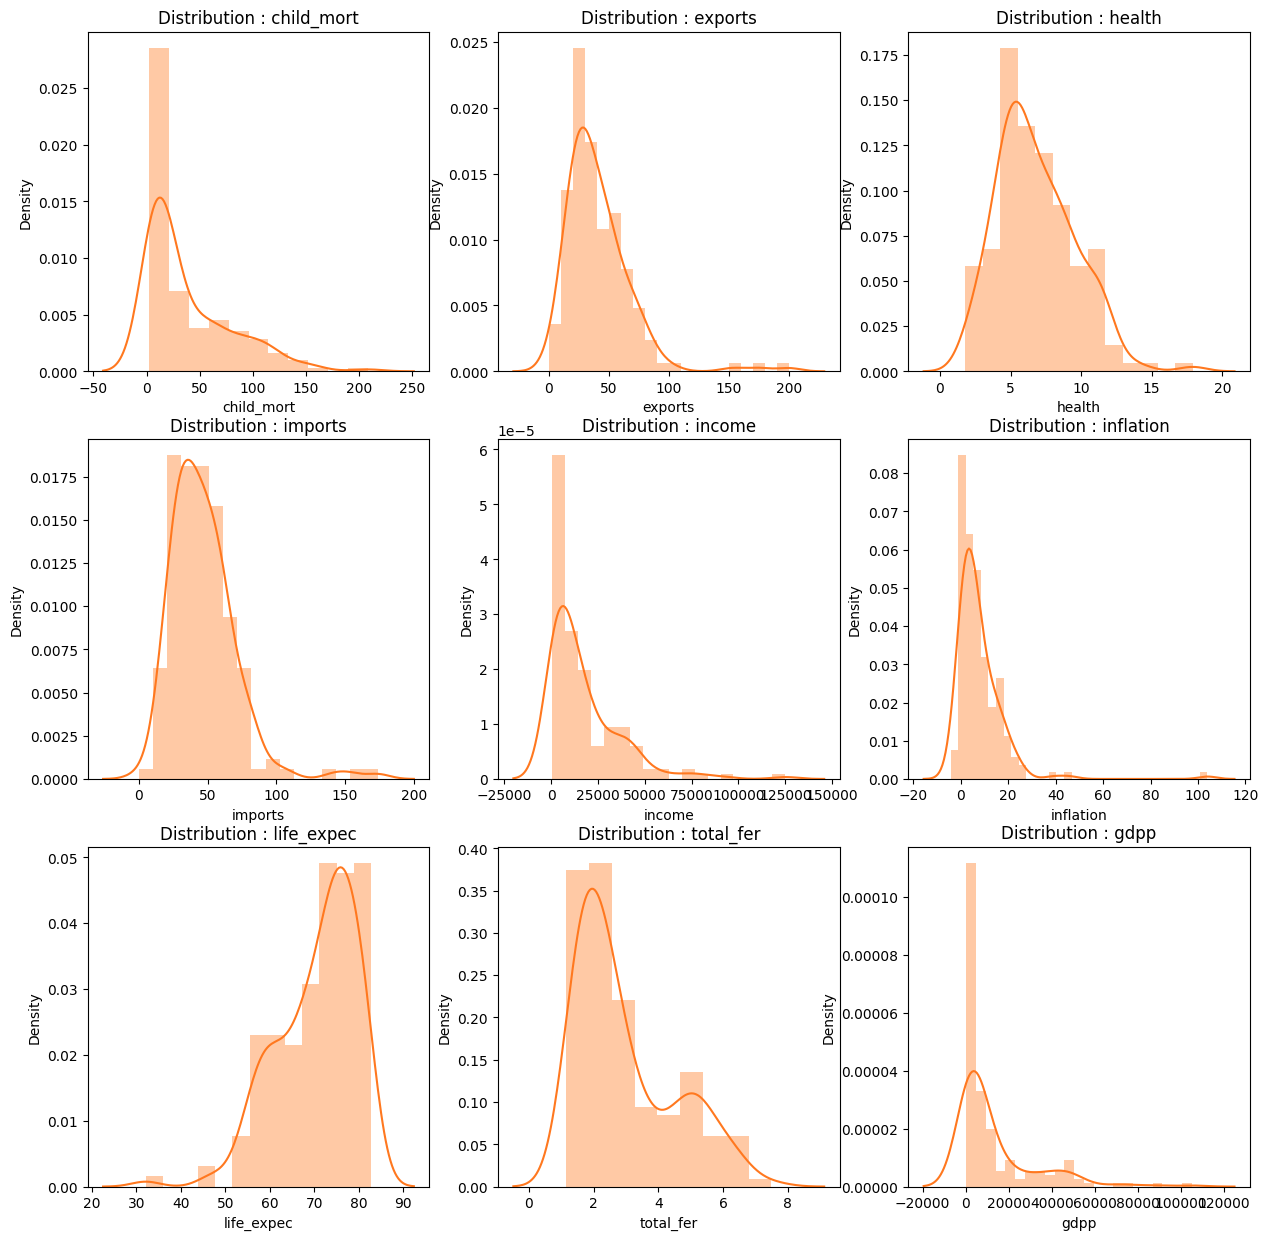

In [ ]:
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

> The range of values for the features in the dataset.

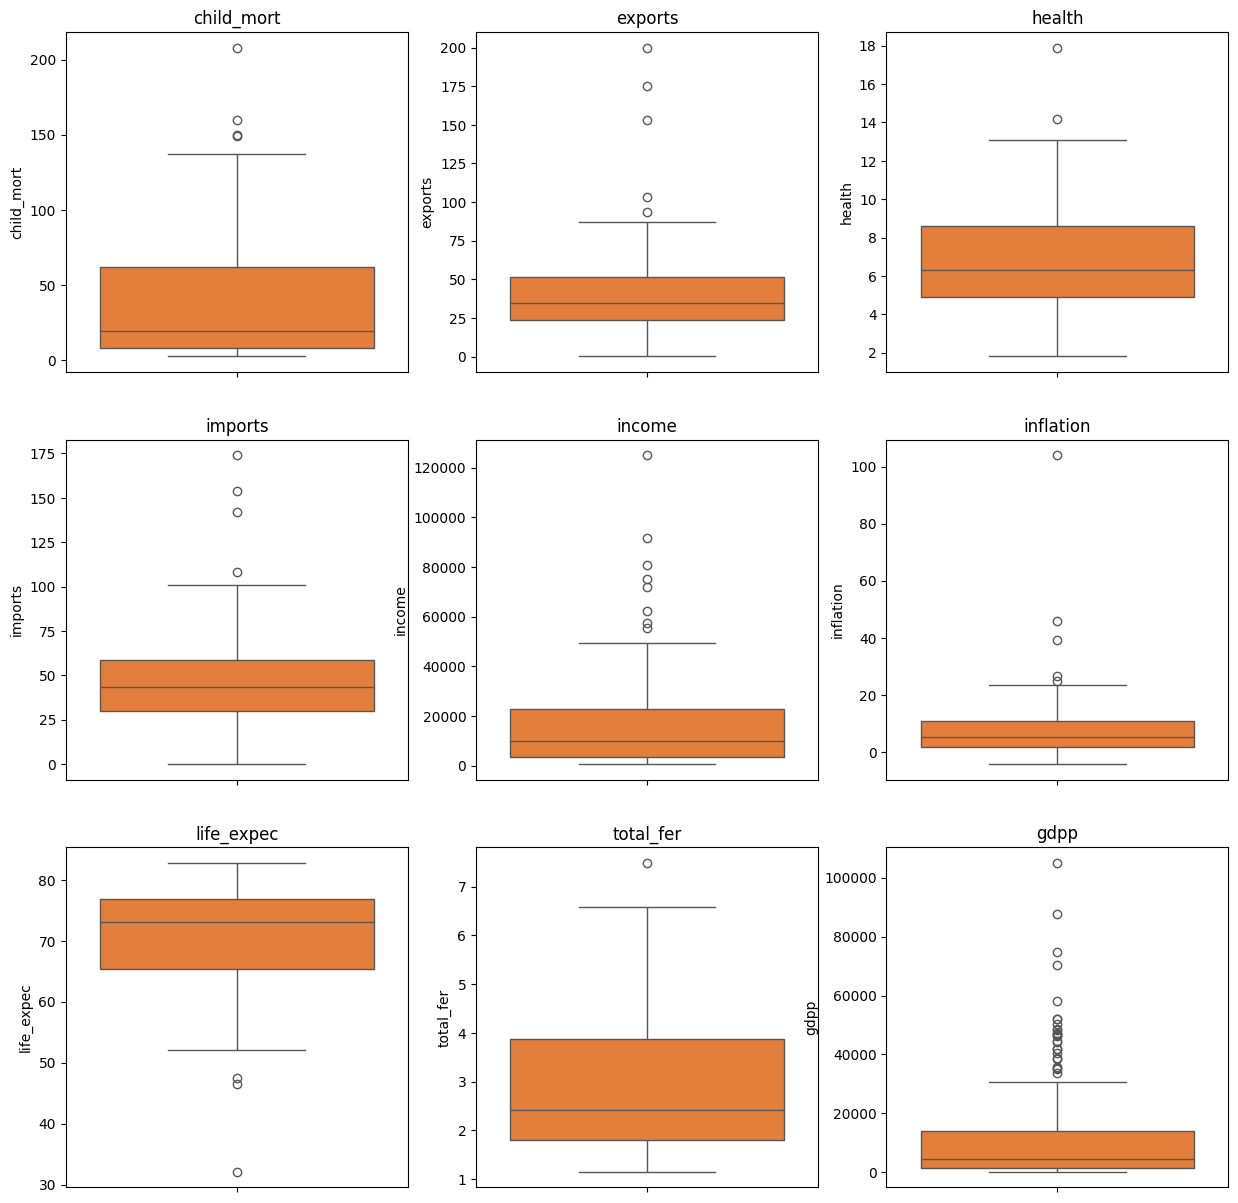

In [ ]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

####B : SOME INTERPRETATIONS

> Finding the top 10 world countries with highest exports.


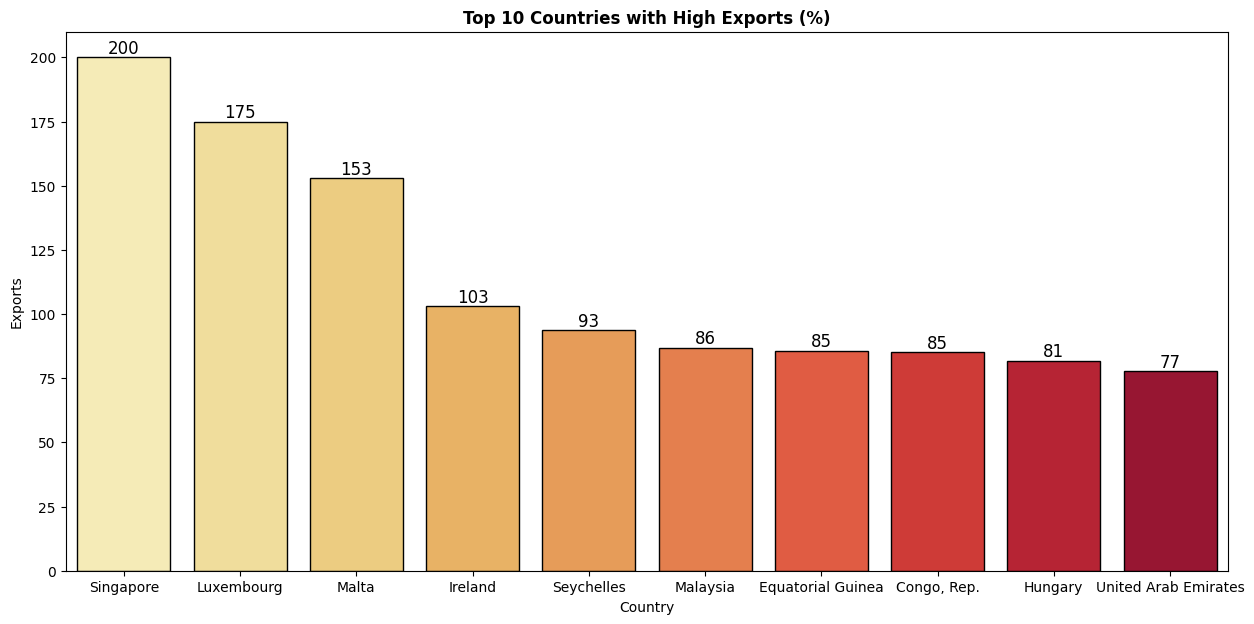

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df.nlargest(10, 'exports')[['country', 'exports']]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='country', y='exports', data=top_countries, palette='YlOrRd', edgecolor='black')
plt.title('Top 10 Countries with High Exports (%)', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Exports')
plt.xticks(rotation=0, ha='center')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), int(rect.get_height()),
            ha='center', va='bottom', fontsize=12)

plt.show()

> As seen above, Singapore has the highest export percentage, followed by Luxembourg, Malta, Ireland, and some others. Quite interesting to see that some of the widely-known first world countries such as the United States, France, or United Kingdom are not in the list.

> Next, let's see the top 5 countries with lowest health spending per capita.

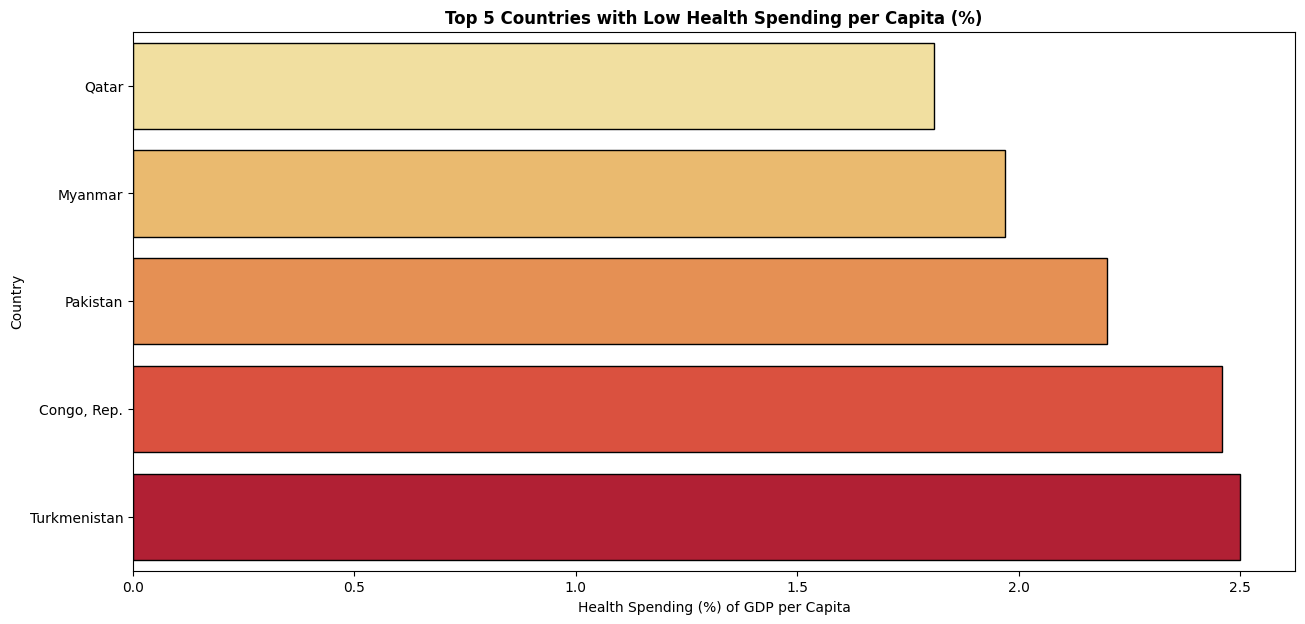

In [ ]:
lowHealthSpend_country = df.nsmallest(5, 'health')
countries = lowHealthSpend_country['country']
health_spending_percentage = lowHealthSpend_country['health']

plt.figure(figsize=(15, 7))
sns.barplot(x=health_spending_percentage, y=countries, palette='YlOrRd', edgecolor='black')
plt.title('Top 5 Countries with Low Health Spending per Capita (%)', fontweight='bold')
plt.xlabel('Health Spending (%) of GDP per Capita')
plt.ylabel('Country')

plt.show()

> From the graph in this particular year, Qatar has the smallest health spending percentage of GDP per capita. Myanmar, Pakistan, Republic of Congo and Turkmenistan are some others with similar little spending.

###PART 3 : FEATURE ENGINEERING (CATEGORIZATION)

> As there are too many fields/features to be accounted for, it would be good to reduce the 9 features into 3 feature groups for easier analysis.

> To accomplish this, a **Feature Correlation Matrix** is used.

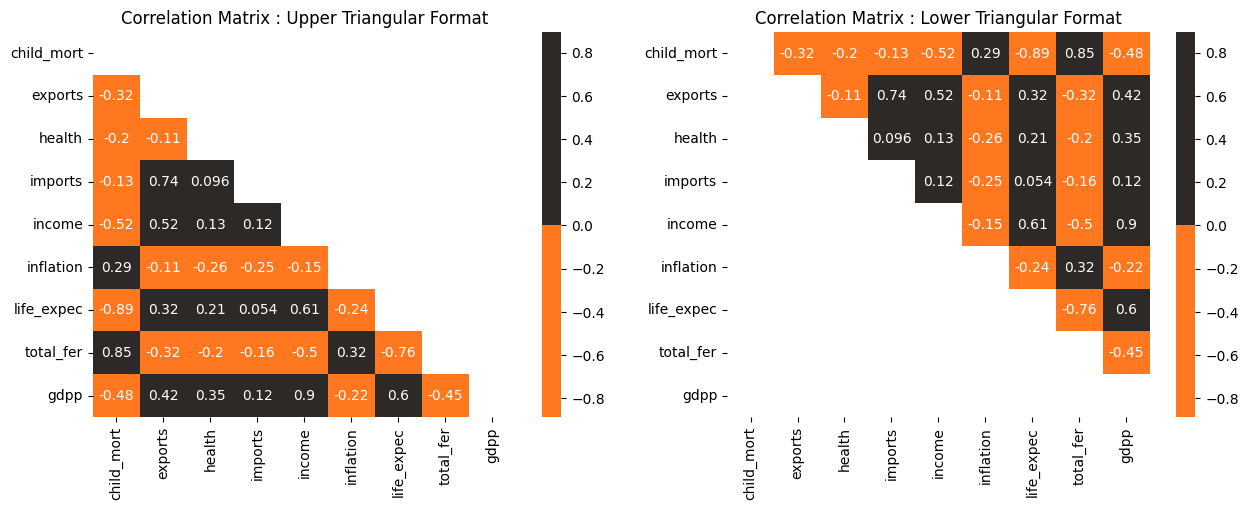

In [ ]:
#CORRELATION MATRIX

#Select only numerical columns from the dataframe
numerical_data = data.select_dtypes(include=[np.number])

#Making the matrix
ut = np.triu(numerical_data.corr())
lt = np.tril(numerical_data.corr())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(numerical_data.corr(), cmap=colors, annot=True, cbar=True, mask=ut)
plt.title('Correlation Matrix : Upper Triangular Format')

plt.subplot(1, 2, 2)
sns.heatmap(numerical_data.corr(), cmap=colors, annot=True, cbar=True, mask=lt)
plt.title('Correlation Matrix : Lower Triangular Format')

plt.show()

> Deriving from the matrix above and combining with the real world logical reasoning, we can attempt to group the 9 features into 3 sectors :    
*   Health Sector : child-mortality, health, life-expectancy, total-fertility
*   Trade Sector : imports, exports
*   Finance Sector : income, inflation, gdpp

> And so, the next step is to simplify the 9 originally mentioned features into these 3 sectors and ensure normalization/standardization is done afterwards.



In [ ]:
#FEATURE CATEGORIZATION

df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head(20)

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24
5,3.45,0.80,4.57
6,2.73,1.47,1.64
7,3.22,0.93,6.57
8,3.36,2.27,6.25
9,3.52,1.76,3.16


In [ ]:
#NORMALIZATION / STANDARDIZATION

from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


###PART 4 : K-MEANS CLUSTERING

> As required by the class professor, the K-Means function seen below is manually coded, where then the K-Means clustering process will **not use the library-provided function**.

> First, let's find the number of *k* (number of clusters) that is most ideal for the K-Means Clustering process.

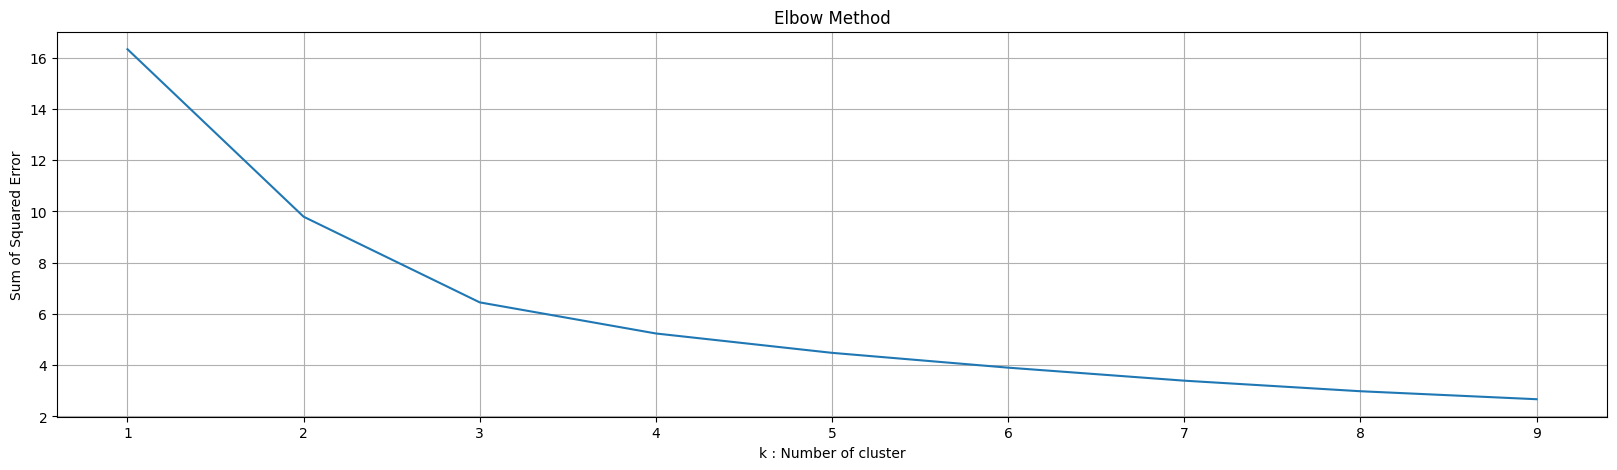

In [ ]:
#ELBOW METHOD (find value of k - how many clusters needed)

m = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance

sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,1,1)
for k in range(1, 10):
    #here, we use KMEANS from library
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

#results : k is 3

> As seen above, the ideal number of *k* will be 3. Therefore, there will be 3 clusters after the K-Means function is called.

> Now, let's move on to creating the manually coded function for K-Means Clustering, with *k* as the resulting number of clusters.

In [ ]:
#MANUAL K-MEANS CLUSTERING FUNCTION (for 3 features)
import numpy as np

def initialize_centers(data, k):
    # Randomly initialize k cluster centers
    np.random.seed(0)  # For reproducibility
    centers_indices = np.random.choice(data.shape[0], k, replace=False)
    centers = data[centers_indices]
    return centers

def assign_to_clusters(data, centers):
    # Assign data points to the nearest cluster based on Euclidean distance
    distances = np.sqrt(((data - centers[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centers(data, clusters, k):
    # Update cluster centers by taking the mean of data points in each cluster
    centers = np.zeros((k, data.shape[1]))
    for cluster_id in range(k):
        cluster_data = data[clusters == cluster_id]
        if len(cluster_data) > 0:
            centers[cluster_id] = np.mean(cluster_data, axis=0)
    return centers

def calculate_total_variance(data, clusters, centers):
    # Calculate the total variance of the clusters
    total_variance = 0
    for cluster_id in range(len(centers)):
        cluster_data = data[clusters == cluster_id]
        if len(cluster_data) > 0:
            cluster_variance = np.sum((cluster_data - centers[cluster_id])**2)
            total_variance += cluster_variance
    return total_variance

def kmeans_multiple_runs(data, k, num_runs=10, max_iter=1000):
    best_clusters = None
    best_centers = None
    best_total_variance = np.inf  # Initialize with a large value

    for _ in range(num_runs):
        # Initialize cluster centers for this run
        centers = initialize_centers(data, k)

        for _ in range(max_iter):
            clusters = assign_to_clusters(data, centers)
            new_centers = update_centers(data, clusters, k)
            if np.allclose(centers, new_centers):
                break
            centers = new_centers

        total_variance = calculate_total_variance(data, clusters, centers)

        if total_variance < best_total_variance:
            best_clusters = clusters
            best_centers = centers
            best_total_variance = total_variance

    return best_clusters, best_centers


> Since there are 3 features (Health, Finance, Trade sectors) that will be taken into consideration, the final clustering will be mapped in a 3-dimensional plot, labeled by colors.

> The plotting function can be seen below.

In [ ]:
#3D-PLOTTING FUNCTION

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_clusters(data, clusters, centers):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot each data point with its assigned cluster color
    for cluster_id in range(len(centers)):
        cluster_data = data[clusters == cluster_id]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster_id}', alpha=0.7)

    # Plot cluster centers as large markers
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Cluster Centers')

    ax.set_xlabel('Health')
    ax.set_ylabel('Trade')
    ax.set_zlabel('Finance')
    ax.set_title('K-means Clustering Results')
    ax.legend()

    plt.show()

> Now that all the necessary functions have been created, let's call the main K-Means function on the 3-feature dataset.

In [ ]:
df1.head(50)

,Country,Health,Trade,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15
5,Argentina,0.19,0.09,0.32
6,Armenia,0.08,0.17,0.10
7,Australia,0.16,0.11,0.46
8,Austria,0.18,0.26,0.44
9,Azerbaijan,0.20,0.21,0.21


In [ ]:
data = df1[['Health', 'Trade', 'Finance']].values
k = 3  # Number of clusters
clusters, centers = kmeans_multiple_runs(data, k)

> After the K-Means function is called, here's a sneak peek of the resulting cluster that each country is grouped into.

In [ ]:
clusters

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0])

> To make this neater, here's what the dataframe looks like after the cluster results are combined into it.

In [ ]:
# Add cluster labels to your DataFrame
df1['Cluster'] = clusters
finaldf = original.copy()
finaldf['Cluster'] = clusters

In [ ]:
finaldf.head(55)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,0
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,1
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,1
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,0
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,1
5,Argentina,14.50,18.90,8.10,16.00,18700,20.90,75.80,2.37,10300,1
6,Armenia,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220,1
7,Australia,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,51900,2
8,Austria,4.30,51.30,11.00,47.80,43200,0.87,80.50,1.44,46900,2
9,Azerbaijan,39.20,54.30,5.88,20.70,16000,13.80,69.10,1.92,5840,1


> Then, the 3d-plot of the resulting clusters will be shown as here.

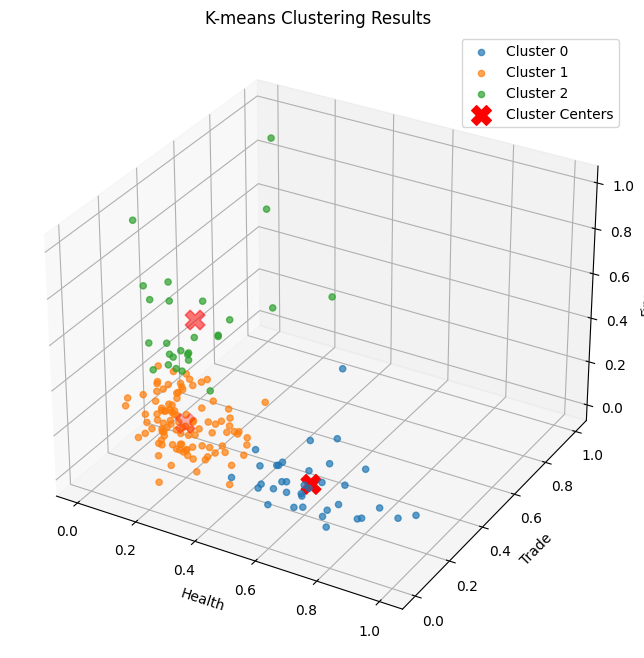

In [ ]:
data = df1[['Health', 'Trade', 'Finance']].values
plot_3d_clusters(data, clusters, centers)

###PART 5 : FINAL COUNTRY URGENCY DATA RESULTS

> Although the countries have been clustered successfully (and the 3d plot looks okay too, haha) there is still needed information on what each cluster represents.

> The 2 original features of "**child-mortality**" and "**income**" are found to be able to *differentiate* the clusters well.

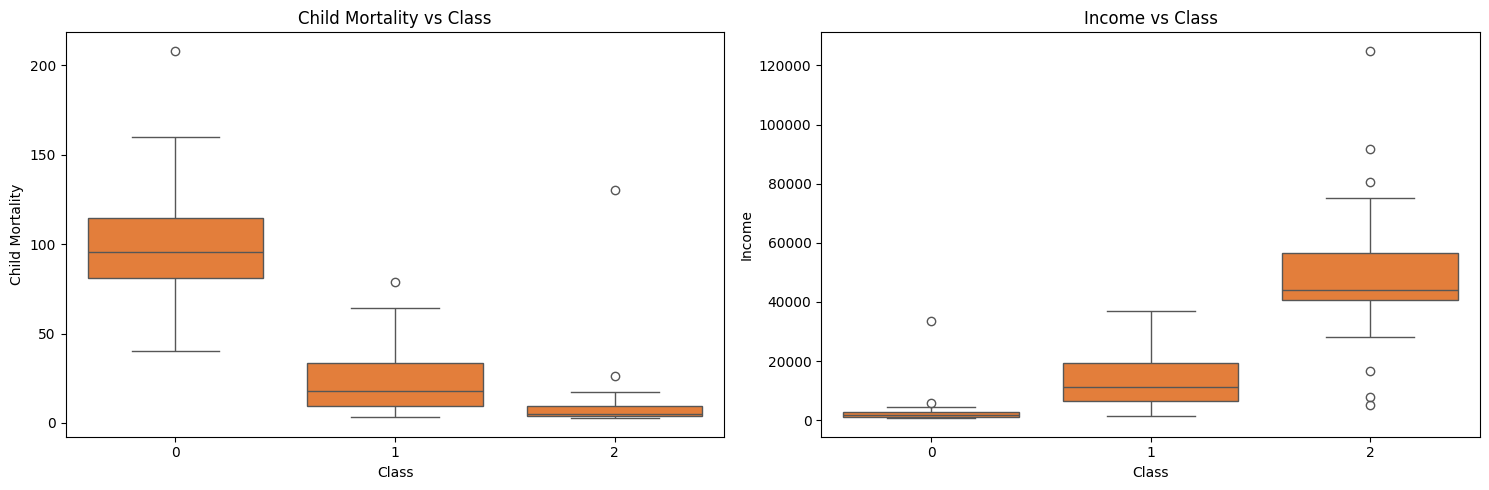

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the child_mort vs Class chart
sns.boxplot(x='Cluster', y='child_mort', data=finaldf, ax=ax1, color='#FF781F')
ax1.set_title('Child Mortality vs Class')
ax1.set_xlabel('Class')
ax1.set_ylabel('Child Mortality')

# Plot the income vs Class chart
sns.boxplot(x='Cluster', y='income', data=finaldf, ax=ax2, color='#FF781F')
ax2.set_title('Income vs Class')
ax2.set_xlabel('Class')
ax2.set_ylabel('Income')

plt.tight_layout()
plt.show()



> Based on the data above:
* Cluster 0 --> high child mortality and low income --> the country is in danger zone
* Cluster 1 --> low child mortality and mid income --> the country can qualify for assistance
* Cluster 2 --> extremely low child mortality and high income --> the country is doing well


> For the final step, let's re-define the cluster based on these meanings.

In [ ]:
# Define the mapping from cluster numbers to labels
finalresults_labels = {
    0: 'immediate attention required',
    1: 'assistance may be needed',
    2: 'good conditions achieved'
}

# Use the replace method to apply the mapping
finaldf['Cluster'] = finaldf['Cluster'].replace(finalresults_labels)

# Now finaldf['Cluster'] contains the updated labels based on the mapping
finaldf.head(55)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,immediate attention required
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,assistance may be needed
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,assistance may be needed
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,immediate attention required
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,assistance may be needed
5,Argentina,14.50,18.90,8.10,16.00,18700,20.90,75.80,2.37,10300,assistance may be needed
6,Armenia,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220,assistance may be needed
7,Australia,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,51900,good conditions achieved
8,Austria,4.30,51.30,11.00,47.80,43200,0.87,80.50,1.44,46900,good conditions achieved
9,Azerbaijan,39.20,54.30,5.88,20.70,16000,13.80,69.10,1.92,5840,assistance may be needed


> Last but not least, the country-clustering-based-on-help-urgency-levels (long name, yes) is now shown in a more visually pleasing way.

In [ ]:
finaldf['Cluster'].loc[finaldf['Cluster'] == 0] = 'Immediate Attention Required'
finaldf['Cluster'].loc[finaldf['Cluster'] == 1] = 'Assistance May Be Needed'
finaldf['Cluster'].loc[finaldf['Cluster'] == 2] = 'Good Conditions Achieved'

fig = px.choropleth(df1[['Country','Cluster']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Country Urgency Conditions',
                    color = finaldf['Cluster'],
                    color_discrete_map = {'Immediate Attention Required':'#CC1414','Assistance May Be Needed':'#F0E32E','Good Conditions Achieved':'#54F02E',}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')